In [6]:
import pandas as pd
import os 

data_dir = "/Users/arianabeloiu/Downloads/data_for_research/input"
file_names = [
    "Akmal_et_al_Malaysia_data.csv",
    "Guam_corals.csv",
    "NCRMP_Florida_corals.csv",
    "NCRMP_Puerto_Rico_corals.csv",
    "NCRMP_USVI_corals.csv",
    "Per_genus_persian_gulf_Hazraty-Kari_et_al.csv",
    "Persian_gulf_Hazraty-Kari_et_al.csv",
    "Sere_et_al_2015_Isle_de_la_Reunion_Disease_Data.csv"
] 

datasets = {file: pd.read_csv(os.path.join(data_dir, file)) for file in file_names}

In [13]:
import numpy as np  

for name, df in datasets.items():
    df["Source"] = name

all_data = pd.concat(datasets.values(), ignore_index=True) 

all_data = all_data.dropna(subset=["disease_prevalence", "Endozoicomonas_tissue"])


In [17]:
pip install scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 17.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for natsort>=4.0.3 from https://files.pythonhosted.org/packages/ef/82/7a9d0550484a62c6da82858ee9419f3dd1ccc9aa1c26a1e43da3ecd20b0d/natsort-8.4.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 32.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-bio: filename=scikit_bio-0.6.2-cp311-cp311-macosx_11_0_arm64.whl size=2354385 sha256=95f8de24bfdc5c8e4d36e34c4dfe33600e6a889b87292b365c83e826786fdada
  Stored in directory: /Users/arianabeloiu/Library/Caches/pip/wheels/74/0c/9a/e6fc75ffc1e6402b314d9fe0a17732f9e582427877f8feea4f
  Created wheel for biom-format: filenam

In [27]:
relevant_data["disease_prevalence"] = pd.to_numeric(relevant_data["disease_prevalence"], errors="coerce")
relevant_data["Endozoicomonas_tissue"] = pd.to_numeric(relevant_data["Endozoicomonas_tissue"], errors="coerce") 

relevant_data = relevant_data.dropna()

/var/folders/__/5zcmln694rlcly_g4cqvbflh0000gn/T/ipykernel_57879/4198253932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data["disease_prevalence"] = pd.to_numeric(relevant_data["disease_prevalence"], errors="coerce")
/var/folders/__/5zcmln694rlcly_g4cqvbflh0000gn/T/ipykernel_57879/4198253932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data["Endozoicomonas_tissue"] = pd.to_numeric(relevant_data["Endozoicomonas_tissue"], errors="coerce")


In [29]:
print(relevant_data.info())
print(relevant_data.head()) 

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 377 to 454
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   disease_prevalence     61 non-null     float64
 1   Endozoicomonas_tissue  61 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB
None
     disease_prevalence  Endozoicomonas_tissue
377                 1.7              58.681818
380                 0.0              41.857143
381                 0.0              58.500000
382                 0.0               5.666667
383                 0.0             425.571429


In [35]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Recalculate pairwise distances to ensure symmetry
distance_matrix = pdist(relevant_data, metric="braycurtis")
square_matrix = squareform(distance_matrix)

# Ensure no NaNs exist in the matrix
square_matrix[np.isnan(square_matrix)] = 0  # Replace NaNs with 0

# Verify symmetry
if not np.allclose(square_matrix, square_matrix.T):
    print("Matrix is not symmetric. Making it symmetric.")
    square_matrix = (square_matrix + square_matrix.T) / 2

# Check for hollow diagonal and fix if necessary
np.fill_diagonal(square_matrix, 0)


/Users/arianabeloiu/anaconda3/lib/python3.11/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.10978928407996875 and the largest is 7.287920522396075.
  warn(


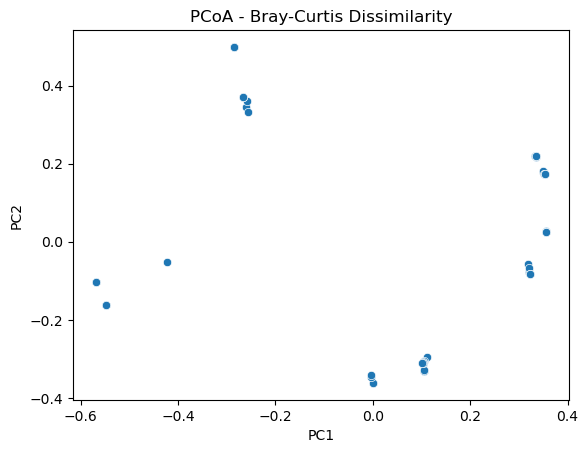

In [37]:
from skbio.stats.distance import DistanceMatrix
from skbio.stats.ordination import pcoa

# Convert to DistanceMatrix
dm = DistanceMatrix(square_matrix)

# Run PCoA
pcoa_results = pcoa(dm)

# Plot the results
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=pcoa_results.samples['PC1'], y=pcoa_results.samples['PC2'])
plt.title("PCoA - Bray-Curtis Dissimilarity")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()